> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - Medical Appointmants No Show

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The original description and dataset is found here: https://www.kaggle.com/datasets/joniarroba/noshowappointments

> The Medical Appointmants dataset contains 110k appointment records in Brazilian hospital system. The project aims to investigate why patients miss their appointments. The data collects associated attributes of each patient below:

> **1. PatientId** - Identification of a patient
<br>**2. AppointmentID** - Identification of each appointment
<br>**3. Gender** - "F" as Female or "M" as Male
<br>**4. DataMarcacaoConsulta** - The date when the patient set up the time for appointment
<br>**5. DataAgendamento** - The date patient called or registered the appointment
<br>**6. Age** - How old is the patient
<br>**7. Neighbourhood** - Where the appointment takes place, the location of hospital
<br>**8. Scholarship** - T/F, whether the patient is in Brasilian welfare program (Bolsa Família)
<br>**9. Hipertension** - T/F, whether the patient has Hipertension
<br>**10. Diabetes** - T/F, whether the patient has Diabetes
<br>**11. Alcoholism** - T/F, whether the patient has Alcoholism
<br>**12. Handcap** - T/F, whether the patient has Handcap
<br>**13. SMS_received** - whether the patient has received a reminder text message.
<br>**14. No-show** - T/F, if the patient showed or not showed for the appointment


### Question(s) for Analysis
>Here are the questions I'd like to investigate on this dataset:
>- What is the percentage of no-show appointments?
>- What is the distribution of medical conditions (e.g. hypertension, diabetes, and alcoholism) among the patients who showed up for their appointments compared to those who did not
>- What is the correlation between patients who received a reminder text message and those who showed up for their appointment?
>- Which neighborhood has the highest percentage of no-show appointments?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In this dataframe, there are 110,527 rows and 14 columns. From the output above, there is no non-null and missing value. For the column name **'Hipertension'** is Spanish or Portuguese of **Hypertension**, I decide to rename it in English for clarification. And **'Handcap'** should be **'Handicap'**. Also there are some adjustments about datatypes, for example, **'PatientId'** needs to be **int**, **'ScheduledDay' and 'AppointmentDay'** change to **datetime**.

In [5]:
df.duplicated().sum()

0

There is no duplicated row.

In [6]:
[sum(df.duplicated('PatientId')), sum(df.duplicated('AppointmentID'))]

[48228, 0]

In [7]:
# Check if negative values contains in PatientId
df[df['PatientId'] < 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [8]:
# Check if negative values contains in AppointmentID
df[df['AppointmentID'] < 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [9]:
df['PatientId'].value_counts().head()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
Name: PatientId, dtype: int64

We can see 'AppointmentId' are all unique, and 'PatientId' has 48,228 duplicated values, which means they have more than one appointment in the dataset. I counted the top 5 patients have the most appointments. Thus, it addresses another issue that these 5 patientId dtype are integers which is different from dataframe info output above. It means some patientId are maybe typos as floats.

In [10]:
df['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [11]:
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

'ScheduledDay' has the time aspect but 'AppointmentDay' doesn't. So in Data Cleaning section, will remove the time aspect.

In [12]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

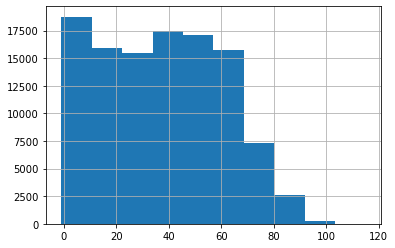

In [13]:
df['Age'].hist();

From the histgram of age, there is at least 1 value less than 0. And some records are larger than 100.

In [14]:
# Find out if the age has negative values
df[df['Age'] < 0]['Age']

99832   -1
Name: Age, dtype: int64

One age is less than 0, it could be the patient is a unborn fetus. Some 

In [15]:
df['Neighbourhood'].nunique()

81

In [16]:
print(df['Scholarship'].unique())
print(df['Hipertension'].unique())
print(df['Alcoholism'].unique())
print(df['Handcap'].unique())
print(df['SMS_received'].unique())
print(df['No-show'].unique())

[0 1]
[1 0]
[0 1]
[0 1 2 3 4]
[0 1]
['No' 'Yes']


The columns 'Scholarship', 'Hipertension', 'SMS_received', 'Alcoholism' are values of 0 or 1, I consider to change them into boolean. 'Handcap'(Handicap) are values [0, 1, 2, 3, 4]. 'No-show' consists of 'No' or 'Yes'.


### Data Cleaning
 

In [17]:
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']

In [18]:
# Find the patient_id values that are not integers
non_int_ids = []

for i in df['patient_id']:
    if not i.is_integer():
        non_int_ids.append(i)
        
print(non_int_ids)

[93779.52927, 537615.28476, 141724.16655, 39217.84439, 43741.75652]


There are 5 patient ids not integers. Next step is using astype to convert all into integer, then check if they are unique values and assocaited appointment ids.

In [19]:
# Find the patientId values that are not integers
df['patient_id'] = df['patient_id'].astype(int)

In [20]:
[sum(df.duplicated('patient_id')), sum(df.duplicated('appointment_id'))]

[48228, 0]

As we can see, the results are the same before cleaning.

In [21]:
# Convert columns to datetime without time aspect
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date

In [22]:
# Explore if the patients scheduled the appointment after the actual appointment date
df[df['appointment_day'] - df['scheduled_day'] < '0 day']

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


I think this obversetion indicates the issue of appointment booking system. To optimize the data analysis, these will be dropped.

In [23]:
df = df[df['appointment_day'] >= df['scheduled_day']]

In [24]:
df.shape

(110522, 14)

In [25]:
# Eliminate the age value less than 0
df = df[df['age'] >= 0]

In [26]:
# Convert columns to boolean
df['scholarship'] = df['scholarship'].astype(bool)
df['hypertension'] = df['hypertension'].astype(bool)
df['diabetes'] = df['diabetes'].astype(bool)
df['alcoholism'] = df['alcoholism'].astype(bool)
df['sms_received'] = df['sms_received'].astype(bool)

In [27]:
# Check out the dataframe after the cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   patient_id       110521 non-null  int64 
 1   appointment_id   110521 non-null  int64 
 2   gender           110521 non-null  object
 3   scheduled_day    110521 non-null  object
 4   appointment_day  110521 non-null  object
 5   age              110521 non-null  int64 
 6   neighbourhood    110521 non-null  object
 7   scholarship      110521 non-null  bool  
 8   hypertension     110521 non-null  bool  
 9   diabetes         110521 non-null  bool  
 10  alcoholism       110521 non-null  bool  
 11  handicap         110521 non-null  int64 
 12  sms_received     110521 non-null  bool  
 13  no_show          110521 non-null  object
dtypes: bool(5), int64(4), object(5)
memory usage: 9.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 What is the percentage of no-show appointments?

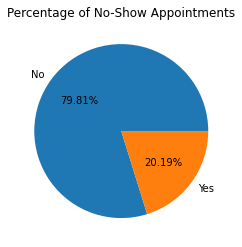

In [28]:
# Count the no_show appointments
count_no_show = df['no_show'].value_counts()

# Create no-show appointments in pie chart, also show the % of no-show patients
plt.pie(count_no_show, labels=count_no_show.index, autopct='%1.2f%%')
plt.title('Percentage of No-Show Appointments')

plt.show()


As can see in the pie chart, 20.19% of overall appointments are no-show.

### Question 2  What is the distribution of medical conditions among the patients who showed up for their appointments compared to those who did not?

In [29]:
# Count all appointments and no-show appointments with each medical conditions
count_by_h = len(df[df['hypertension']]==True)
count_by_d = len(df[df['diabetes']]==True)
count_by_a = len(df[df['alcoholism']]==True)


# Group the data by no-show and count the number of each medical condition
group_by_cond = df.groupby('no_show')[['hypertension', 'diabetes', 'alcoholism']].sum()

print(group_by_cond)
print('{} patients have hypertension, and {} missed their appointments'.format(count_by_h, group_by_cond['hypertension'].iloc[1]))
print('{} patients have diabetes, and {} missed their appointments'.format(count_by_d, group_by_cond['diabetes'].iloc[1]))
print('{} patients have alcoholism, and {} missed their appointments'.format(count_by_a, group_by_cond['alcoholism'].iloc[1]))

         hypertension  diabetes  alcoholism
no_show                                    
No              18029      6513        2683
Yes              3772      1430         677
21801 patients have hypertension, and 3772 missed their appointments
7943 patients have diabetes, and 1430 missed their appointments
3360 patients have alcoholism, and 677 missed their appointments


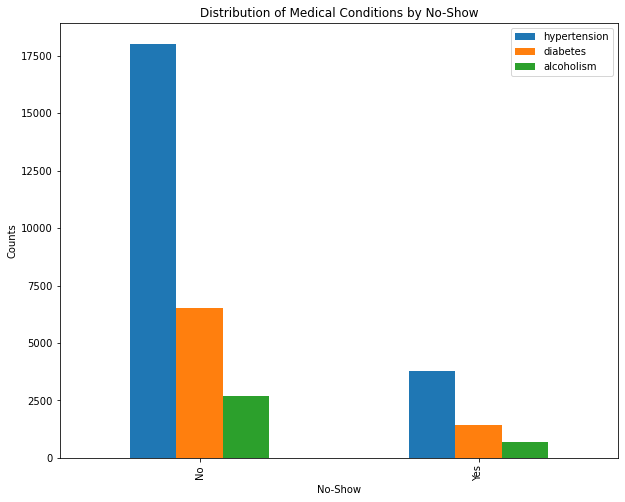

In [30]:
# Create the bar chart about show/no-show percentage for each condition
group_by_cond.plot(kind='bar', figsize=(10, 8))

plt.title('Distribution of Medical Conditions by No-Show')
plt.xlabel('No-Show')
plt.ylabel('Counts')

plt.show()

### Question 3 What is the correlation between patients who received a reminder text message and those who showed up for their appointment?

In [31]:
# Calculate the correlation coeifficent
corr = df['sms_received'].corr(df['no_show'].map({'Yes': 1, 'No': 0}))
corr

0.12650244787849318

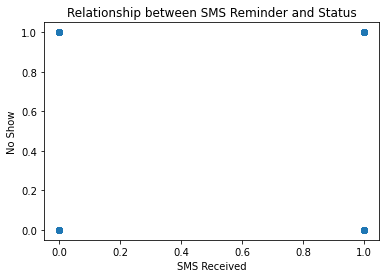

In [32]:
# Create the scatterplot
x = df['sms_received']
y = df['no_show'].apply(lambda x: 1 if x == 'Yes' else 0)

plt.scatter(x, y)
plt.title("Relationship between SMS Reminder and Status")
plt.xlabel('SMS Received')
plt.ylabel('No Show')
plt.show()

The points are plotted on (1, 1), (0, 0), (0, 1), (1, 0) because 'sms_received' and 'no_show' are binary values (0 or 1).

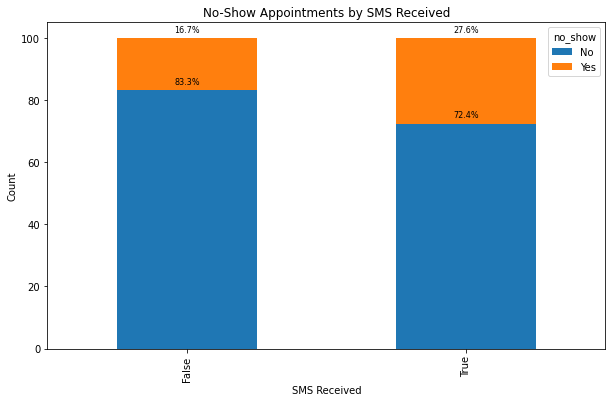

In [33]:
grouped = df.groupby(['sms_received', 'no_show']).size().unstack()
grouped_pct = grouped.apply(lambda x: x/x.sum() * 100, axis=1)

# Plot stacked bar chart
fig = grouped_pct.plot.bar(stacked=True, figsize=(10, 6))

# Set chart title and axis labels
plt.title('No-Show Appointments by SMS Received')
plt.xlabel('SMS Received')
plt.ylabel('Count')

# Add pct label for each stack
for container in fig.containers:
    fig.bar_label(container, labels=[f'{val:.1f}%' if val > 0 else '' for val in container.datavalues], 
                 label_type='edge', fontsize=8, padding=4)

# Show plot
plt.show()

83.3% of the patients who're not SMS received attended the appointment. And 72.4% of patinets who're SMS received attended. From the scatter plot and stacked bar chart above, we cannotn tell the strong correlation between them.

### Question 4  Which top five neighborhoods have the highest percentage of no-show appointments?

In [34]:
# Replace the value into numeric
df['no_show'] = df['no_show'].replace({'No': 0, 'Yes': 1})

# Group by neighbourhood, calculate the percentage of no_show
# Sort in descending order
no_show_by_hood = df.groupby('neighbourhood')['no_show'].mean().sort_values(ascending=False).head(5)

no_show_by_hood

neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
Name: no_show, dtype: float64

As we can see, the neighborhood ILHAS OCEÂNICAS DE TRINDADE has 100% no-show rate, means nobody from ILHAS OCEÂNICAS DE TRINDADE attended the appointments.

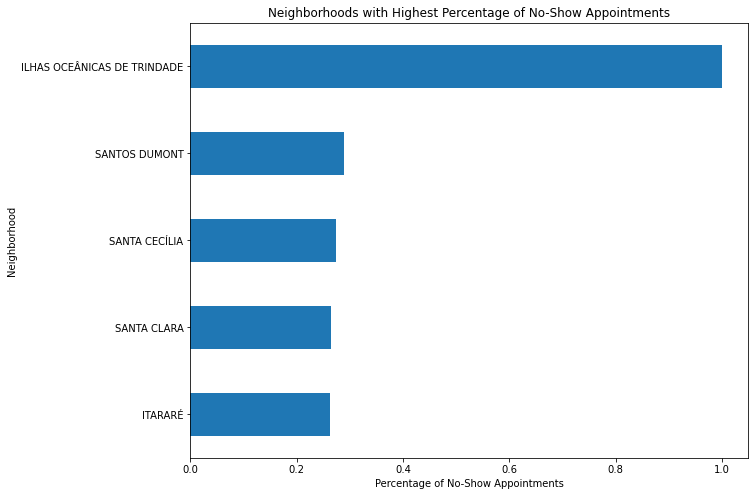

In [35]:
# Create a horizontal bar chart
no_show_by_hood.sort_values().plot.barh(figsize=(10,8))
plt.title('Neighborhoods with Highest Percentage of No-Show Appointments')
plt.xlabel('Percentage of No-Show Appointments')
plt.ylabel('Neighborhood')
plt.show()

<a id='conclusions'></a>
## Conclusion ##

> - From the age distribution, majority of patients are between the age range of 0 to 65.
> - Overall 20% of the patients missed their appointment.
> - 17.3% of hypertension patients missed their appointments, 18% no-show rate for diabetes, and 20.1% for alcoholism, which are all close to the overall 20% of no-show rate
> - There is a limitation of finding the correlation between no_show and sms_received or other attributes. Scatterplot is not a great option to plot the variables with binary values. Hope to explore more in Practical Statistics.
> - Some neighborhoods that have no_show rates that higher than 20%. So the neighnorhoods is strongly related (has strong correlation) with patients not showing for the appointments.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [36]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])